In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from skimage import io

In [2]:
x_width = 1920
y_width = 1080
x0 = x_width/2
y0 = y_width/2

a = 1.92
b = 1.08
c = 300.0
d = 650.0

In [8]:
path = "flowers1080p.jpg"
img = io.imread(path)
print(img.shape)

(1080, 1920, 3)


In [55]:
x_width = 1920
y_width = 1080
x0 = x_width/2
y0 = y_width/2

MUL_BITS = 8
VIGNETTE_BITS = 10

a = 2.0
b = 1.0
c = 300.0
d = 550.0
FILTER_MIN_FRAC = 0.25
f = 0.15
one = 1-1/(2**VIGNETTE_BITS)
h1 = one-f*(one-FILTER_MIN_FRAC)

In [56]:
vignette_xform = np.zeros((2**VIGNETTE_BITS))
FILTER_MIN = (2**MUL_BITS) * FILTER_MIN_FRAC
for i in range(2**VIGNETTE_BITS):
    r2 = i * (2**(18-VIGNETTE_BITS+1))
    r = np.sqrt(r2)
    if r < c:
        vignette_xform[i] = 2**MUL_BITS-1;
    elif r > d:
        vignette_xform[i] = FILTER_MIN;
    else:
        t = (r-c)/(d-c)
#         vignette_xform[i] = (1/2)*(1+np.cos(math.pi*t)) *(1-FILTER_MIN_FRAC) + FILTER_MIN_FRAC
        if t < f:
            vignette_xform[i] = (1-h1)*np.cos(0.5*math.pi*t/f) + h1
        else:
            vignette_xform[i] = (h1-FILTER_MIN_FRAC)*np.cos(0.5*math.pi*(1+(t-f)/(1-f))) + h1

        vignette_xform[i] = int(np.clip(np.round(vignette_xform[i] * (2**MUL_BITS)), FILTER_MIN, 2**MUL_BITS-1))

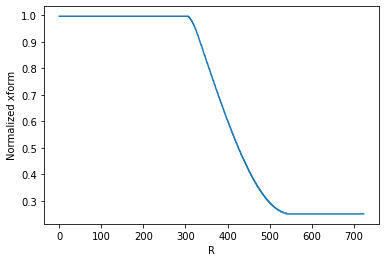

In [75]:
radius = np.sqrt(np.array(range(2**VIGNETTE_BITS))*(2**(18-VIGNETTE_BITS+1)))
plt.plot(radius, vignette_xform/256)
plt.xlabel("R")
plt.ylabel("Normalized xform")
plt.show()

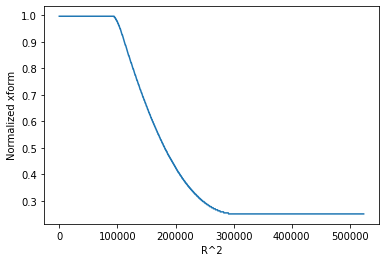

In [76]:
radius = np.array(range(2**VIGNETTE_BITS))*(2**(18-VIGNETTE_BITS+1))
plt.plot(radius, vignette_xform/256)
plt.xlabel("R^2")
plt.ylabel("Normalized xform")
plt.show()

In [11]:
vignette_3mask = np.zeros((y_width, x_width, 3))
for x in range(x_width):
    for y in range(y_width):
        r_2 = np.floor((x-x0)/2)**2 + (y-y0)**2
        if r_2 < c**2:
            vignette_3mask[y][x] = 1
        elif r_2 > d**2:
            vignette_3mask[y][x] = FILTER_MIN_FRAC
        else:    
            index = r_2.astype(int) >> (18-VIGNETTE_BITS+1)
            vignette_3mask[y][x][0] = vignette_xform[index.astype(int)] / float(2**MUL_BITS)
            vignette_3mask[y][x][1] = vignette_3mask[y][x][0]
            vignette_3mask[y][x][2] = vignette_3mask[y][x][0]
            

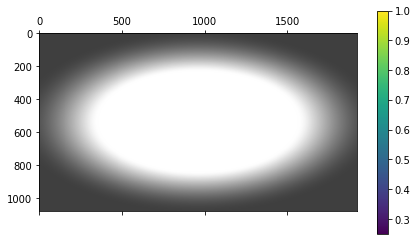

In [44]:
plt.matshow(vignette_3mask)
plt.colorbar()

In [13]:
img2 = np.multiply(img, vignette_3mask/(2.0**MUL_BITS))

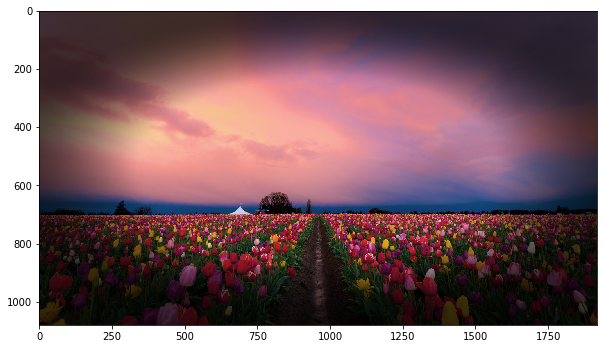

In [14]:
figure(figsize=(10, 10))
plt.imshow(img2)

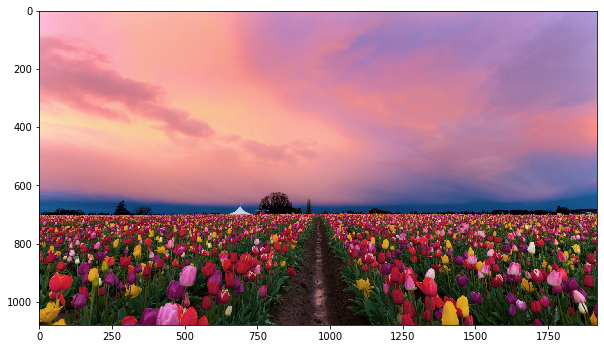

In [15]:
figure(figsize=(10, 10))
plt.imshow(img)

## Vignette + avg color mask

In [133]:
x_width = 1920
y_width = 1080
x0 = x_width/2
y0 = y_width/2

MUL_BITS = 8
VIGNETTE_BITS = 10


####
# Vary these parameters
####
a = 2.0
b = 1.0
c = 300.0
d = 550.0
FILTER_MIN_FRAC = 0.1
f = 0.15
####


one = 1-1/(2**VIGNETTE_BITS)
h1 = one-f*(one-FILTER_MIN_FRAC)

In [134]:
vignette_xform_v2 = np.zeros((2**VIGNETTE_BITS))
FILTER_MIN = (2**MUL_BITS) * FILTER_MIN_FRAC
for i in range(2**VIGNETTE_BITS):
    r2 = i * (2**(18-VIGNETTE_BITS+1))
    r = np.sqrt(r2)
    if r < c:
        vignette_xform_v2[i] = 2**MUL_BITS-1;
    elif r > d:
        vignette_xform_v2[i] = FILTER_MIN;
    else:
        t = (r-c)/(d-c)
#         vignette_xform_v2[i] = (1/2)*(1+np.cos(math.pi*t)) *(1-FILTER_MIN_FRAC) + FILTER_MIN_FRAC
        if t < f:
            vignette_xform_v2[i] = (1-h1)*np.cos(0.5*math.pi*t/f) + h1
        else:
            vignette_xform_v2[i] = (h1-FILTER_MIN_FRAC)*np.cos(0.5*math.pi*(1+(t-f)/(1-f))) + h1

        vignette_xform_v2[i] = int(np.clip(np.round(vignette_xform_v2[i] * (2**MUL_BITS)), FILTER_MIN, 2**MUL_BITS-1))

In [135]:
vignette_3mask_v2 = np.zeros((y_width, x_width, 3))
for x in range(x_width):
    for y in range(y_width):
        r_2 = np.floor((x-x0)/2)**2 + (y-y0)**2
        if r_2 < c**2:
            vignette_3mask_v2[y][x] = 1
        elif r_2 > d**2:
            vignette_3mask_v2[y][x] = FILTER_MIN_FRAC
        else:    
            index = r_2.astype(int) >> (18-VIGNETTE_BITS+1)
            vignette_3mask_v2[y][x][0] = vignette_xform_v2[index.astype(int)] / float(2**MUL_BITS)
            vignette_3mask_v2[y][x][1] = vignette_3mask_v2[y][x][0]
            vignette_3mask_v2[y][x][2] = vignette_3mask_v2[y][x][0]
            

In [136]:
avg_color = [0xF0, 0x80, 0xF0]
avg_color = [0x80, 0x40, 0x80]
vignette_bkgnd_mask = 1-vignette_3mask_v2

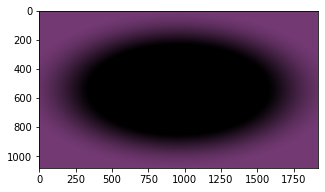

In [137]:
img3 = np.multiply(avg_color, vignette_bkgnd_mask/(2.0**MUL_BITS))
figure(figsize=(5, 5))
plt.imshow(img3)

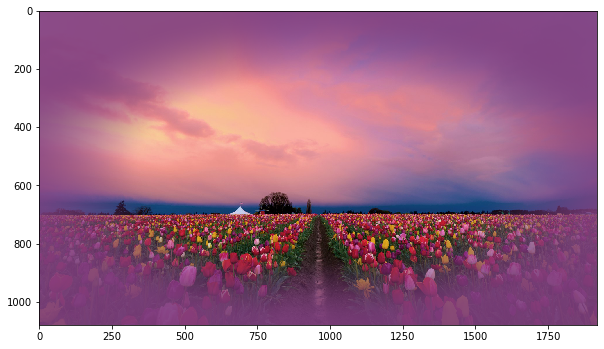

In [139]:
img4 = np.multiply(img, vignette_3mask_v2/(2.0**MUL_BITS)) + img3
figure(figsize=(10, 10))
plt.imshow(img4)

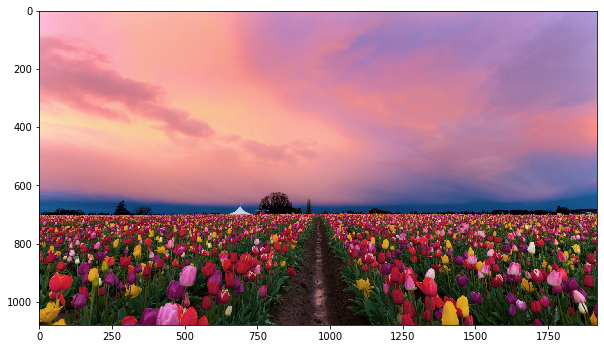

In [109]:
figure(figsize=(10, 10))
plt.imshow(img)

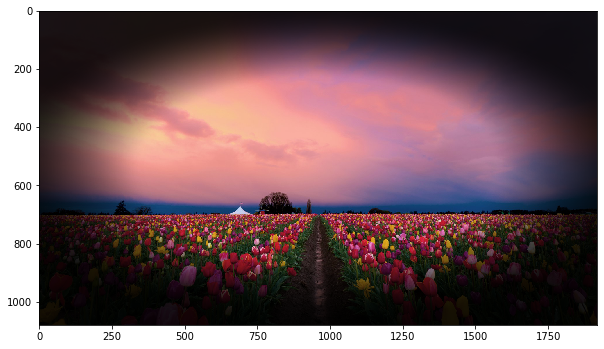

In [110]:
img5 = np.multiply(img, vignette_3mask_v2/(2.0**MUL_BITS))
figure(figsize=(10, 10))
plt.imshow(img5)

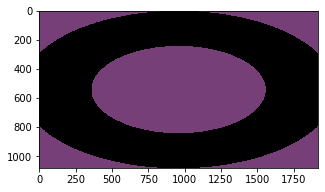

In [76]:
tmp = 0.5*np.floor(vignette_3mask) + 0.5*np.floor(vignette_bkgnd_mask)
img6 = np.multiply(avg_color, tmp/(2.0**MUL_BITS))
figure(figsize=(5, 5))
plt.imshow(img6)

In [140]:
np.savetxt("vignette_xform_10.mem", vignette_xform_v2.astype(int), fmt="%02x", delimiter='\n')

In [36]:
def load_xform(fname):
    with open(fname, 'r') as f:
        lines = f.readlines()
        xform = np.zeros(len(lines))
        for i in range(len(lines)):
            xform[i] = int(lines[i], 16)
    return xform

xform_25 = load_xform("vignette_xform.mem")
xform_10 = load_xform("vignette_xform_10.mem")

Text(0, 0.5, 'Normalized dropoff fraction')

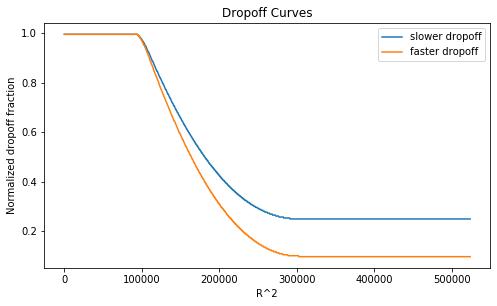

In [77]:
figure(figsize=(8, 4.5))
plt.title("Dropoff Curves")
radius = np.array(range(2**VIGNETTE_BITS))*(2**(18-VIGNETTE_BITS+1))
plt.plot(radius, xform_25/256)
plt.plot(radius, xform_10/256)
plt.legend(("slower dropoff", "faster dropoff"))
plt.xlabel("R^2")
plt.ylabel("Normalized dropoff fraction")

Text(0, 0.5, 'Normalized dropoff fraction')

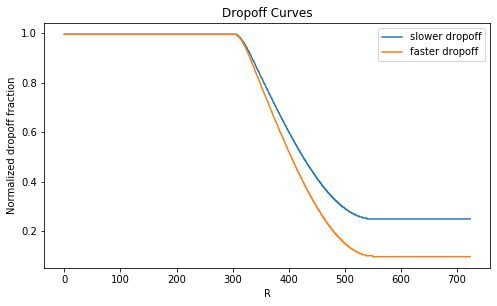

In [78]:
figure(figsize=(8, 4.5))
plt.title("Dropoff Curves")
radius = np.sqrt(np.array(range(2**VIGNETTE_BITS))*(2**(18-VIGNETTE_BITS+1)))
plt.plot(radius, xform_25/256)
plt.plot(radius, xform_10/256)
plt.legend(("slower dropoff", "faster dropoff"))
plt.xlabel("R")
plt.ylabel("Normalized dropoff fraction")